Data saved to 1.3) Distance_from_feed_21x21.csv


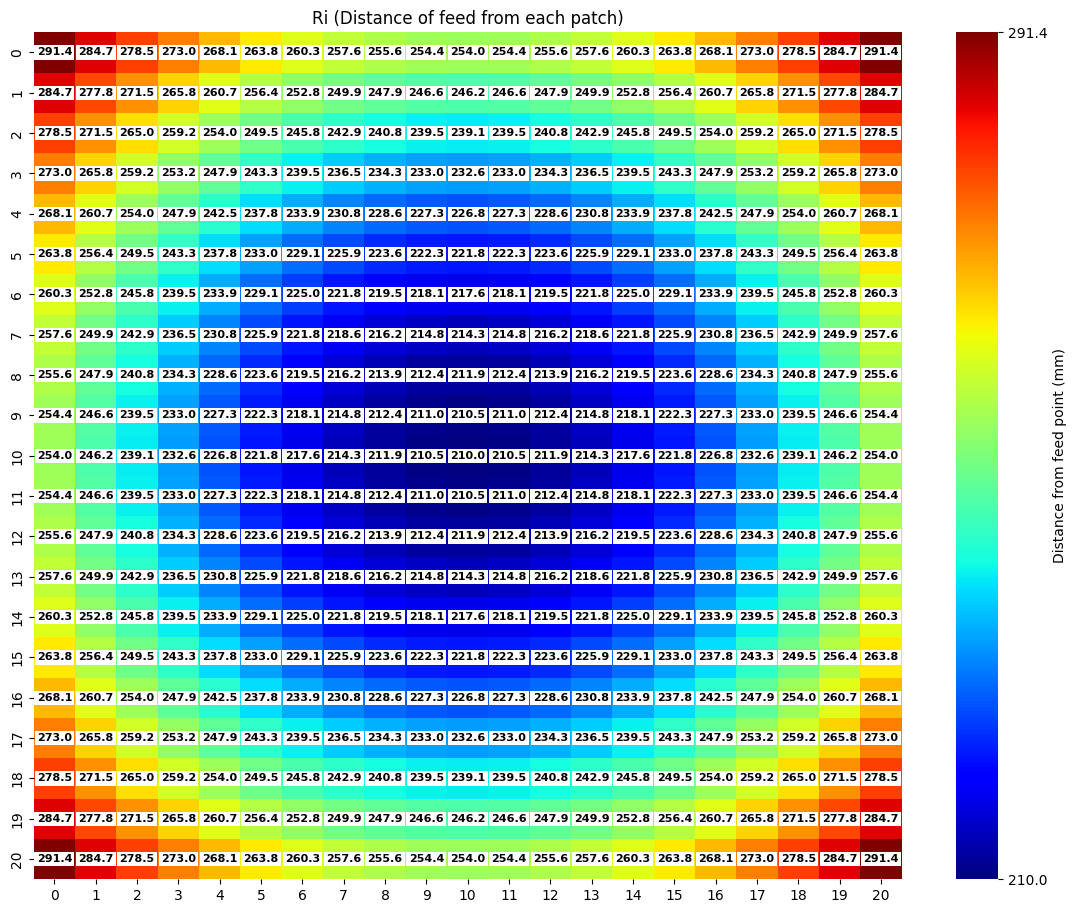

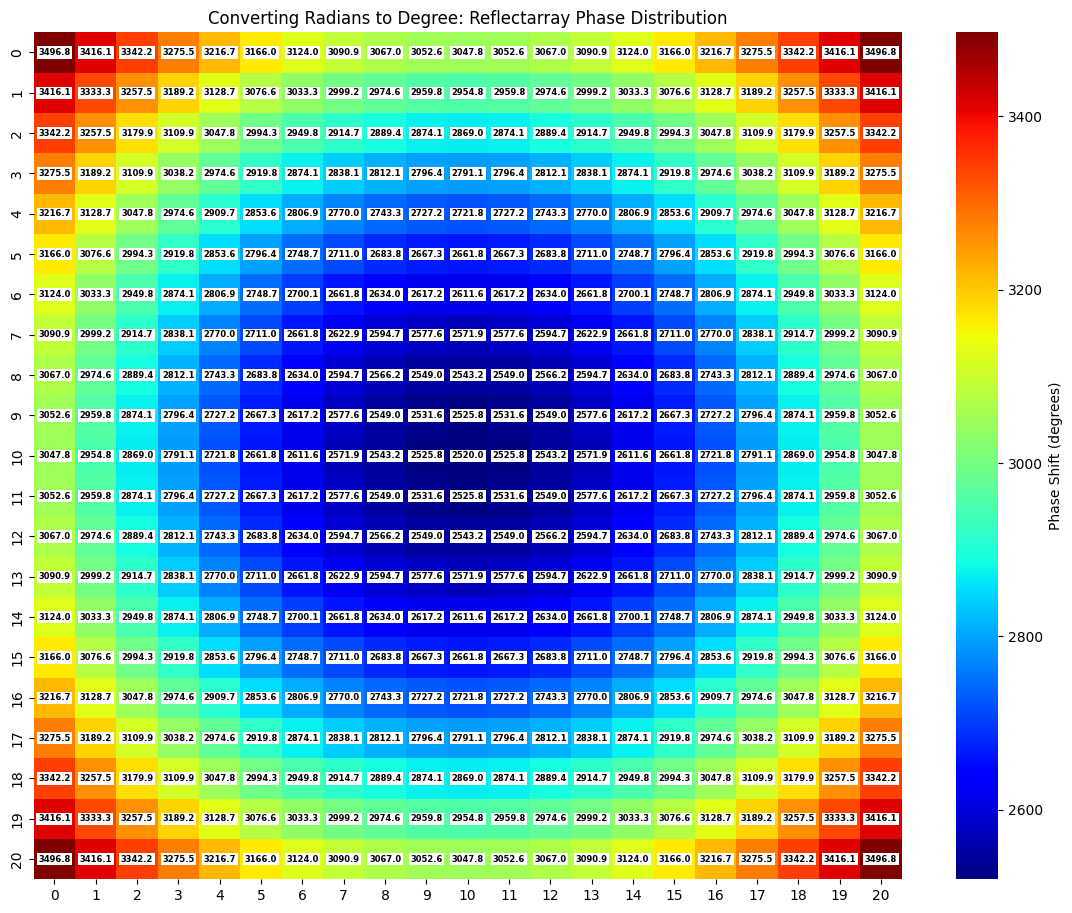

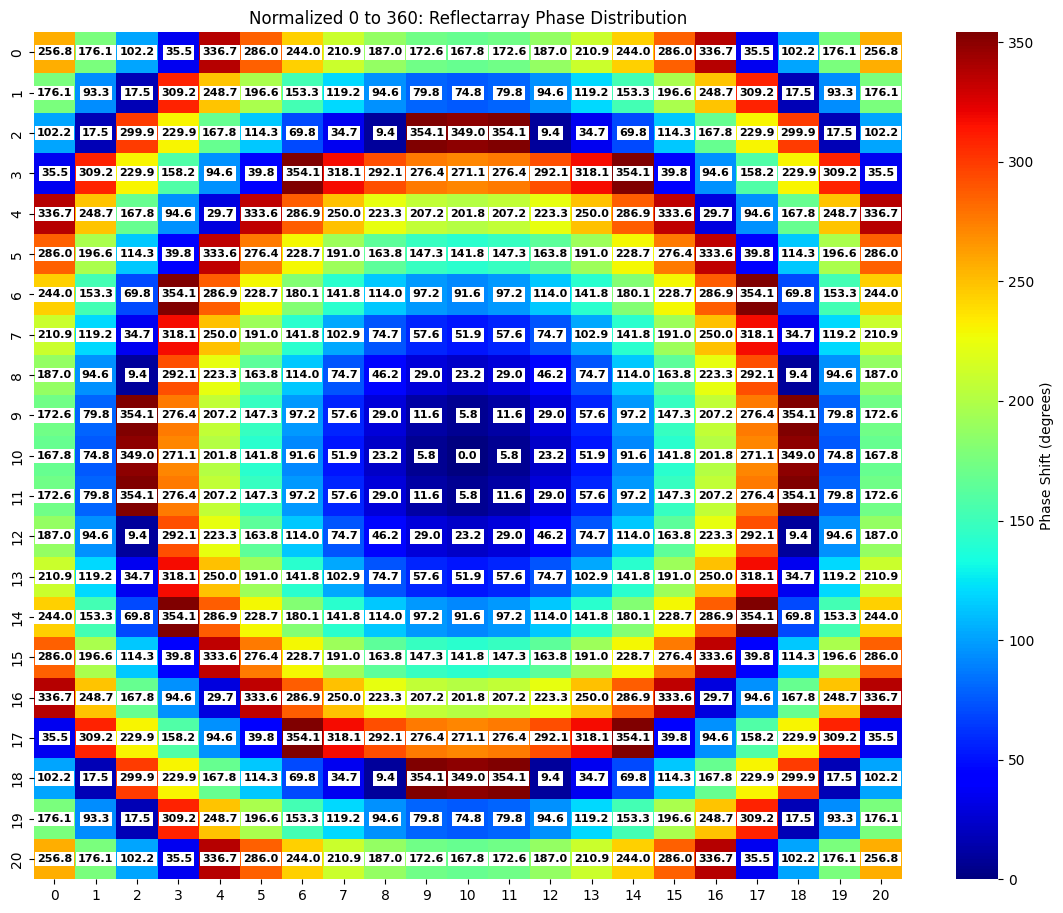

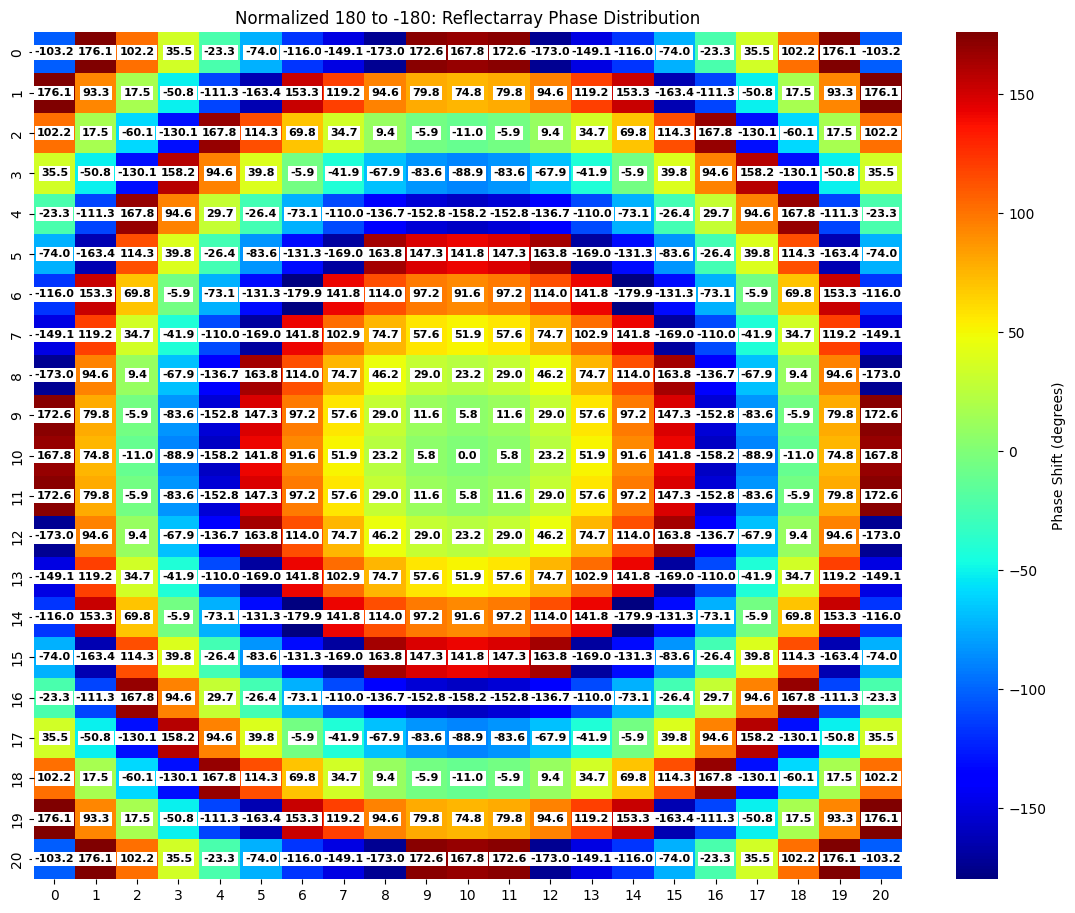

Phase data saved to 1.9) phase_distribution.csv
Highest Phase Value: 176.08 degrees
Lowest Phase Value: -179.85 degrees


CSV file saved to: 1.12) patch size distribution.csv
Highest Patch Value: 14.78 mm
Lowest Patch Value: 5.61 mm


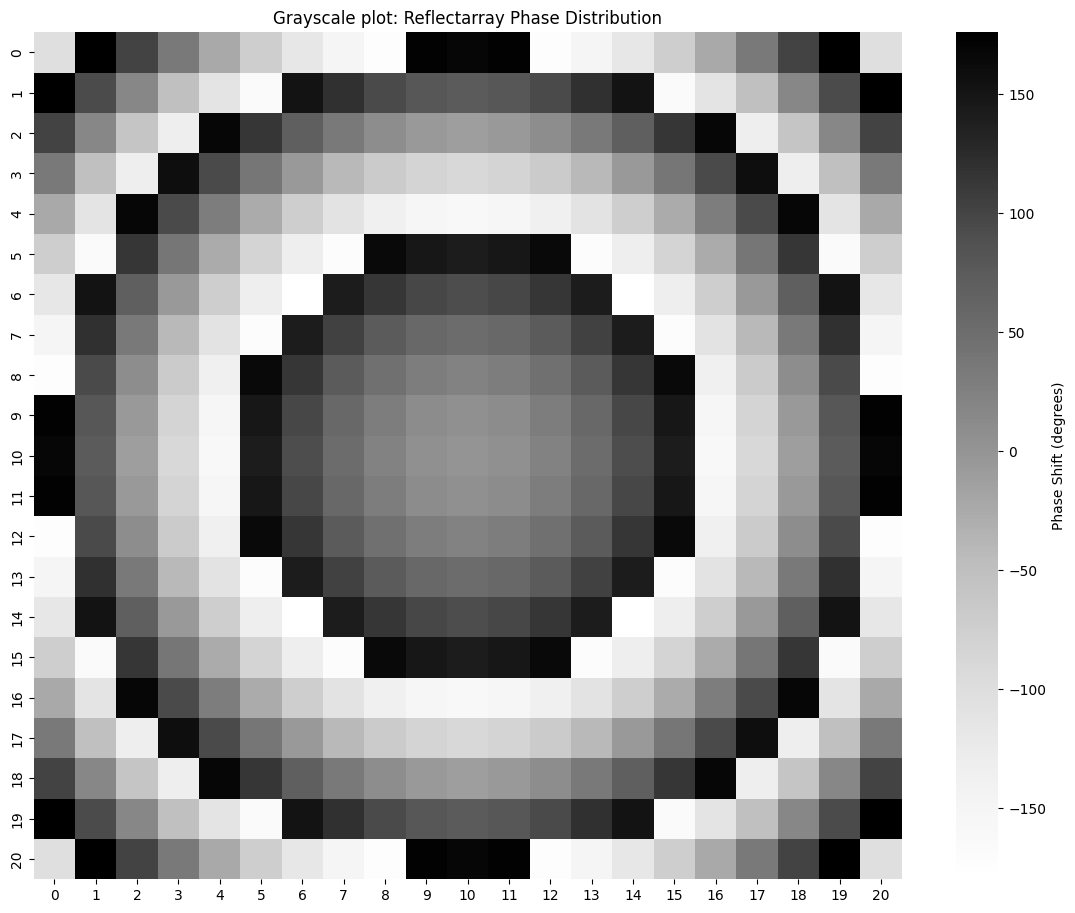

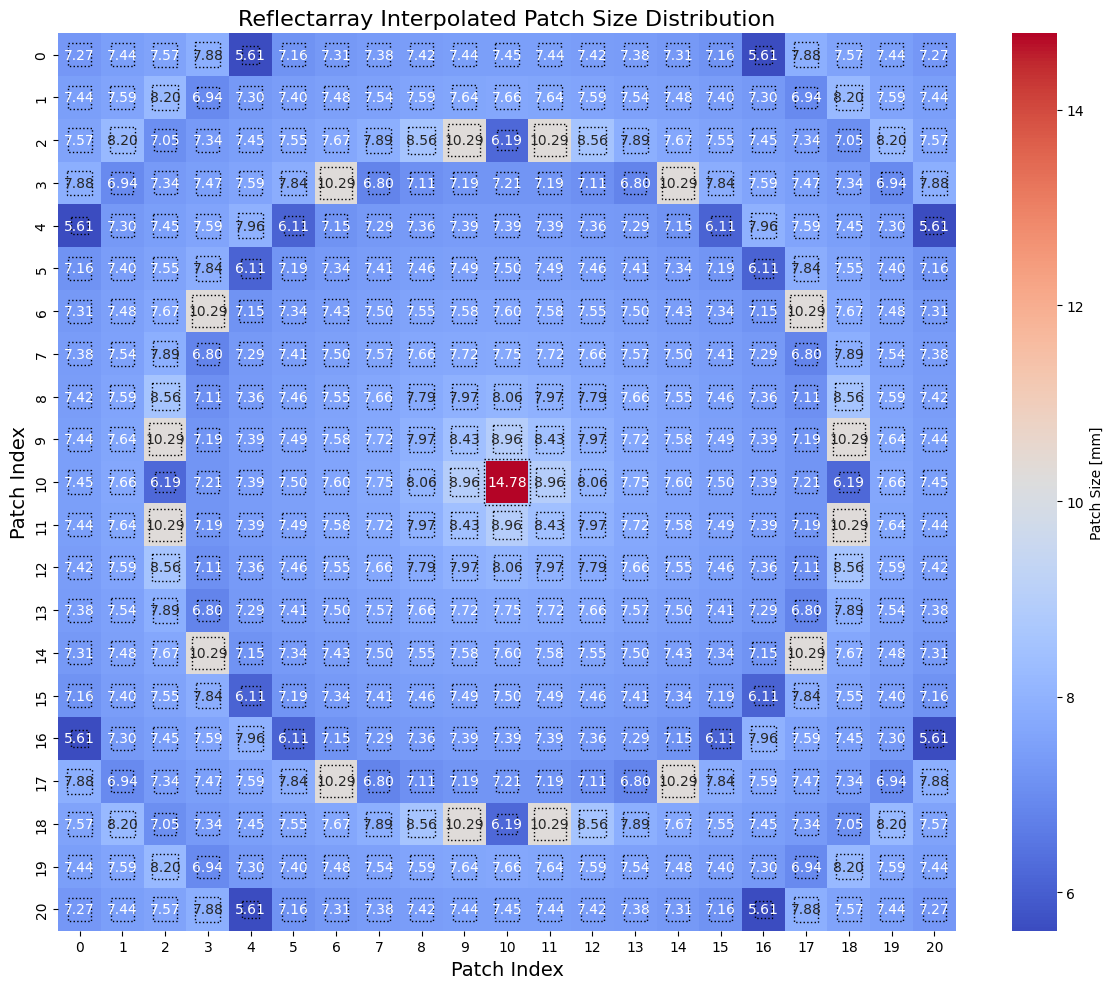

[7.268285981190301, 7.43782946600003, 7.572538333433058, 7.876822560264363, 5.608167306069641, 7.156694706934993, 7.309751621000996, 7.381778751253824, 7.422926287840603, 7.443644130412494, 7.450705046558673, 7.443644130412494, 7.422926287840603, 7.381778751253824, 7.309751621000996, 7.156694706934993, 5.608167306069641, 7.876822560264363, 7.572538333433057, 7.43782946600003, 7.268285981190301, 7.43782946600003, 7.588875254471127, 8.195145195842391, 6.943989505561962, 7.300368421771918, 7.404606868053006, 7.477605588716893, 7.540879184730644, 7.586518692869676, 7.638538660905091, 7.656706161104153, 7.638538660905091, 7.586518692869676, 7.540879184730644, 7.477605588716893, 7.404606868053006, 7.300368421771918, 6.943989505561962, 8.195145195842391, 7.588875254471127, 7.43782946600003, 7.572538333433058, 8.195145195842391, 7.047709146621125, 7.342334459716429, 7.450705046558673, 7.549977093484172, 7.67490426287111, 7.887221886417676, 8.5595750421755, 10.293796162103565, 6.188061803084004

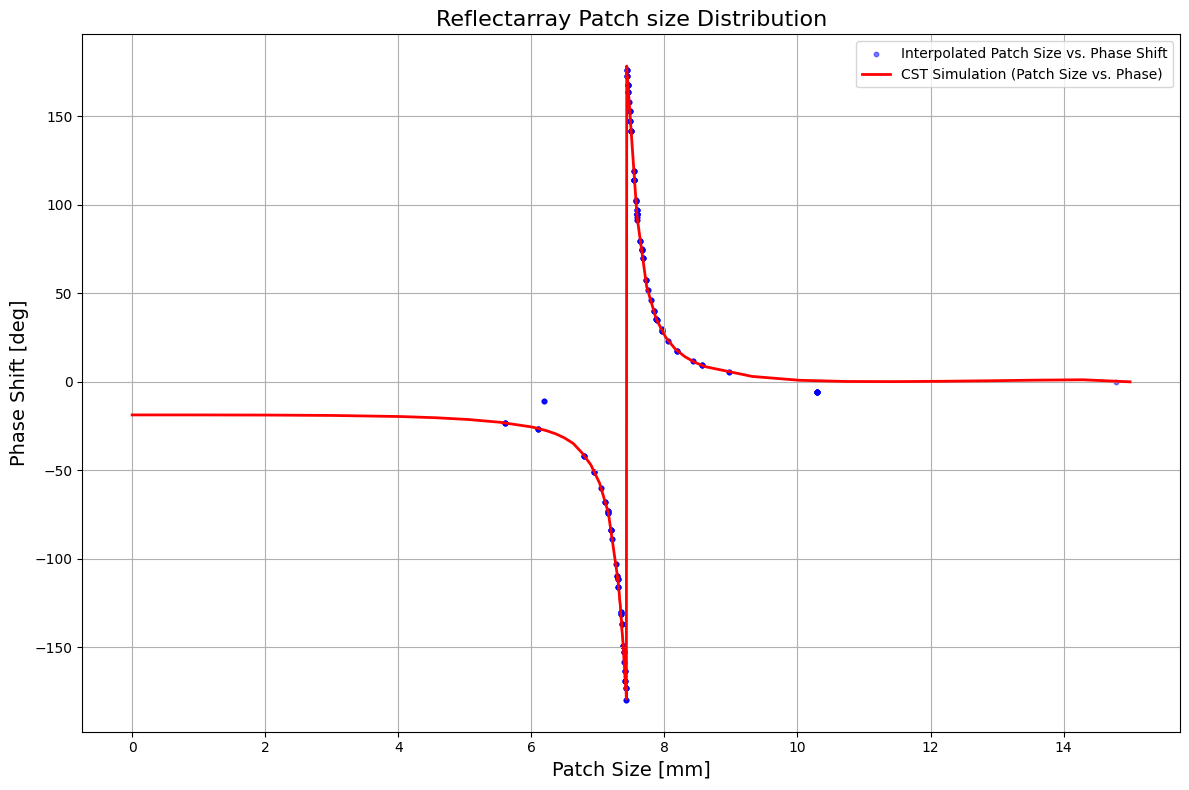

In [1]:
import numpy as np
import pandas as pd
from math import sin, cos, pi, radians, degrees
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import plotly.graph_objects as go
import csv
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import os
import re

frequency = 10e9 
wavelength_mm = 3e8 / frequency * 1000  
k0 = 2 * pi / wavelength_mm 
spacing = wavelength_mm/2.1

theta = 0 # Elevation angle in degrees
phi = 0  # Azimuth angle in degrees

feed_point_position_mm = np.array([0, 0, 210])

x_positions_mm = np.linspace(-spacing * 10, spacing * 10, 21)
y_positions_mm = np.linspace(-spacing * 10, spacing * 10, 21)

X, Y = np.meshgrid(x_positions_mm, y_positions_mm); 
Z = np.zeros_like(X)

x_positions_mm
y_positions_mm
#----------------------------------------------------------------------------------------------------------------
#                                        DISTANCE FROM FEED TO PATCH
#----------------------------------------------------------------------------------------------------------------

#### OUTPUT-1.1 ########################################################
#Determining center location of patches

# DataFrame for csv file
df_positions = pd.DataFrame(index=np.arange(1, 23), columns=np.arange(1, 23))

# Fill in the row and column headers
df_positions.iloc[0, 1:] = np.arange(1, 22)
df_positions.iloc[1:, 0] = np.arange(1, 22)

# Fill in the positions
for i, x in enumerate(x_positions_mm, start=1):
    for j, y in enumerate(y_positions_mm, start=1):
        df_positions.iloc[j, i] = f"({x:.2f}, {y:.2f})"


# Export to CSV
csv_file_path = '1.1) Center location of patches.csv'
df_positions.to_csv(csv_file_path, index=False, header=False)

csv_file_path

#### OUTPUT-1.2 ########################################################
#3D visualization of the Ri distance (feed from patch elements) 

# Function to calculate distances and plot elements
def calculate_distance_and_plot_elements(X, Y, Z, feed_point, fig):
    distances = np.sqrt((X - feed_point[0])**2 + (Y - feed_point[1])**2 + (Z - feed_point[2])**2)
    fig.add_trace(go.Scatter3d(x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
                               mode='markers', marker=dict(size=2, color='blue'), name='Array Elements',
                               hoverinfo='text',
                               text=[f'x: {x:.2f}, y: {y:.2f}, z: {z:.2f}, Distance: {d:.2f} mm' for x, y, z, d in zip(X.flatten(), Y.flatten(), Z.flatten(), distances.flatten())]))
    for x, y, z, d in zip(X.flatten(), Y.flatten(), Z.flatten(), distances.flatten()):
        fig.add_trace(go.Scatter3d(x=[x, feed_point[0]], y=[y, feed_point[1]], z=[z, feed_point[2]],
                                   mode='lines', line=dict(color='green', width=2), hoverinfo='text',
                                   text=[f'Distance: {d:.2f} mm']))
    return distances
fig = go.Figure()

# Load distance data from CSV file
df = pd.read_csv('1.3) Distance_from_feed_21x21.csv')
Ri = df.to_numpy(dtype=float)  # Convert DataFrame to numpy array for processing
fig = go.Figure()

# Calculate distances and plot elements
distances = calculate_distance_and_plot_elements(X, Y, Z, feed_point_position_mm, fig)

# Add the feed point to the plot
fig.add_trace(go.Scatter3d(x=[feed_point_position_mm[0]], y=[feed_point_position_mm[1]], z=[feed_point_position_mm[2]],
                           mode='markers', marker=dict(size=10, color='red'), name='Feed Point',
                           hoverinfo='text', text=[f'Feed Point\nx: {feed_point_position_mm[0]:.2f}, y: {feed_point_position_mm[1]:.2f}, z: {feed_point_position_mm[2]:.2f}']))

# Update plot layout for elements and feed point location
fig.update_layout(title='3D Plot of Element Positions, Feed Point Location, and Connection Lines',
                  scene=dict(xaxis_title='X Position (mm)', yaxis_title='Y Position (mm)', zaxis_title='Z Position (mm)'),
                  margin=dict(l=0, r=0, b=0, t=30))

#### OUTPUT-1.3 ########################################################
#Saving the 3D visualization of the Ri distance (feed from patch elements) to csv

# Save the calculated distances to CSV
csv_file_path_array = '1.3) Distance_from_feed_21x21.csv'
with open(csv_file_path_array, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Distance from Feed(mm)'] * 21)  # Header
    for row in distances:
        writer.writerow(row)
print(f"Data saved to {csv_file_path_array}")
fig.show()

#### OUTPUT-1.4 ########################################################
#2D plot heat map depicting locations of the patches from the feed

# Generate the heatmap
df = pd.read_csv(csv_file_path_array)
distances_array = df.to_numpy(dtype=float) # Convert the DataFrame to a 2D array of distances for color mapping
plt.figure(figsize=(14, 11))
ax = sns.heatmap(distances_array, annot=True, fmt=".1f", cmap='jet', cbar_kws={'label': 'Distance from feed point (mm)'})
ax.set_title('Ri (Distance of feed from each patch)')
cbar = ax.collections[0].colorbar
cbar.set_ticks([np.min(distances_array), np.max(distances_array)])
for text in ax.texts:
    text.set_size(8)
    text.set_weight('bold')
    text.set_color('black') 
    text.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.2'))
plt.show()

#----------------------------------------------------------------------------------------------------------------
#                                       PHASE DISTRIBUTION OF THE REFLECTARRAY
#----------------------------------------------------------------------------------------------------------------

# Calculate phase shift for all elements in radians
phi_a = k0 * (Ri - np.sin(np.radians(theta)) * (X * np.cos(np.radians(phi)) + Y * np.sin(np.radians(phi))))

# Convert phase shift from radians to degrees
phi_a_deg = np.degrees(phi_a)

# Normalize phase shift to be within the range 0-360 degrees
phi_a_deg_normalized = phi_a_deg % 360

# For the range -180 to 180 degrees, adjust the phase values
phi_a_deg_adjusted = np.where(phi_a_deg_normalized > 180, phi_a_deg_normalized - 360, phi_a_deg_normalized)

#### OUTPUT-1.5 ########################################################
#2D plot heat map depicting phase shift values at all 441 patch locations

#Generate the heatmap for phase distribution 
plt.figure(figsize=(14, 11))
ax = sns.heatmap(phi_a_deg.reshape(21, 21), annot=True, fmt=".1f", cmap='jet',
                 cbar_kws={'label': 'Phase Shift (degrees)'})
ax.set_title('Converting Radians to Degree: Reflectarray Phase Distribution')
for text in ax.texts:
    text.set_size(6)  # Adjust font size
    text.set_weight('bold')  # Bold text for visibility
    text.set_color('black') 
    text.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.2'))
plt.show()

#### OUTPUT-1.6 ########################################################
#2D plot heat map depicting phase shift values at all 441 patch locations

#Generate the heatmap for phase distribution 
plt.figure(figsize=(14, 11))
ax = sns.heatmap(phi_a_deg_normalized.reshape(21, 21), annot=True, fmt=".1f", cmap='jet',
                 cbar_kws={'label': 'Phase Shift (degrees)'})
ax.set_title('Normalized 0 to 360: Reflectarray Phase Distribution')
for text in ax.texts:
    text.set_size(8)  # Adjust font size
    text.set_weight('bold')  # Bold text for visibility
    text.set_color('black') 
    text.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.2'))
plt.show()

#### OUTPUT-1.7 ########################################################
#2D plot heat map depicting phase shift values at all 441 patch locations

#Generate the heatmap for phase distribution 
plt.figure(figsize=(14, 11))
ax = sns.heatmap(phi_a_deg_adjusted.reshape(21, 21), annot=True, fmt=".1f", cmap='jet',
                 cbar_kws={'label': 'Phase Shift (degrees)'})
ax.set_title('Normalized 180 to -180: Reflectarray Phase Distribution')
for text in ax.texts:
    text.set_size(8)  # Adjust font size
    text.set_weight('bold')  # Bold text for visibility
    text.set_color('black') 
    text.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.2'))
plt.show()

#### OUTPUT-1.8 ########################################################
#2D Grayscale plot

#Generate the heatmap for phase distribution
plt.figure(figsize=(14, 11))
ax = sns.heatmap(phi_a_deg_adjusted.reshape(21, 21), annot=False, fmt=".1f", cmap='Greys',
                 cbar_kws={'label': 'Phase Shift (degrees)'})
ax.set_title('Grayscale plot: Reflectarray Phase Distribution')

#### OUTPUT-1.9 ########################################################
#2D plot heat map depicting phase shift values at all 441 patch locations to csv

#Save phase data to CSV
csv_file_path_phase = '1.9) phase_distribution.csv'
with open(csv_file_path_phase, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Phase Shift (degrees)'] * 21)  # Header
    for row in phi_a_deg_adjusted.reshape(21, 21):
        writer.writerow(row)
print(f"Phase data saved to {csv_file_path_phase}")

#### OUTPUT-1.10 ########################################################
# Finding the highest and lowest values of the phase distribution

highest_phase_value = np.max(phi_a_deg_adjusted)
lowest_phase_value = np.min(phi_a_deg_adjusted)
print(f"Highest Phase Value: {highest_phase_value:.2f} degrees")
print(f"Lowest Phase Value: {lowest_phase_value:.2f} degrees")

#----------------------------------------------------------------------------------------------------------------
#                                       CST data
#----------------------------------------------------------------------------------------------------------------

#### OUTPUT-1.11 ########################################################
#Deembedded: Range of Patch size versus Phase Shift, Reflection, and Normalized Phase

# Step 1: Read the Phase and Reflection Data
phase_file_path = '2.1) Unit cell data with deembedding -180 to 180.txt'
reflection_file_path = '2.1) Unit cell data with deembedding reflection.txt'

# Reading phase data, skipping initial comments and header row
phase_data = pd.read_csv(phase_file_path, comment='#', delimiter='\t', names=['Wp', 'Phase'], skiprows=2)

# Reading reflection data
reflection_data = pd.read_csv(reflection_file_path, comment='#', delimiter='\t', skiprows=2)
reflection_data.columns = ['Wp', 'Reflection']

# Normalize the phase data
phase_data['Normalized Phase'] = phase_data['Phase'].apply(lambda x: (x + 360) % 360 if x < 0 else x)

# Define colors for each data line for better visibility and emphasis
colors = {
    "Phase": "blue",  # Primary data
    "Normalized Phase": "red",  # Secondary importance
    "Reflection": "#A9A9A9"  # Subtle grey for less visual impact
}

# Create a plot with customized y-axes for each data type
fig = go.Figure()

# Reflection Data
fig.add_trace(go.Scatter(x=reflection_data['Wp'], y=reflection_data['Reflection'], name='Reflection', mode='lines+markers', line=dict(color=colors["Reflection"]), yaxis='y1'))

# Normalized Phase Data
fig.add_trace(go.Scatter(x=phase_data['Wp'], y=phase_data['Normalized Phase'], name='Normalized Phase (0 to 360)', mode='lines+markers', line=dict(color=colors["Normalized Phase"]), yaxis='y2'))

# Original Phase Data
fig.add_trace(go.Scatter(x=phase_data['Wp'], y=phase_data['Phase'], name='Phase (-180 to 180)', mode='lines+markers', line=dict(color=colors["Phase"]), yaxis='y3'))

# Layout - titles, axes, etc., with adjusted legend and axes positions
fig.update_layout(
    title='Deembedded: Range of Patch size versus Phase Shift, Reflection, and Normalized Phase',
    xaxis_title='Patch size (mm)',
    yaxis=dict(
        title='Reflection',
        titlefont=dict(color=colors["Reflection"]),
        tickfont=dict(color=colors["Reflection"]),
        range=[1.1 * reflection_data['Reflection'].min(), 1.1 * reflection_data['Reflection'].max()]
    ),
    yaxis2=dict(
        title='Phase (0 to 360)',
        titlefont=dict(color=colors["Normalized Phase"]),
        tickfont=dict(color=colors["Normalized Phase"]),
        overlaying='y',
        side='left',
        position=0.1,
        range=[0, 360]  # Setting the range from 0 to 360
    ),
    yaxis3=dict(
        title='Phase (-180 to 180)',
        titlefont=dict(color=colors["Phase"]),
        tickfont=dict(color=colors["Phase"]),
        overlaying='y',
        side='right',
        position=1,
        range=[-180, 180]  # Setting the range from -180 to 180
    ),
    legend=dict(
        x=0.9,
        y=0.9,
        traceorder='normal',
        bgcolor='rgba(255,255,255,0.5)',
        xanchor='auto',
        yanchor='auto'
    )
)

# Show the figure
fig.show()

#----------------------------------------------------------------------------------------------------------------
#                                       LINEAR INTERPOLATION
#----------------------------------------------------------------------------------------------------------------

# Load the CSV files needed for interpolation
phase_file_path = '2.1) Unit cell data with deembedding -180 to 180.txt'
reflection_file_path = '2.1) Unit cell data with deembedding reflection.txt'

# Correctly reading the phase and reflection data from the files
phase_data = pd.read_csv(phase_file_path, delimiter='\t', comment='#', names=['Wp', 'Phase'])
reflection_data = pd.read_csv(reflection_file_path, delimiter='\t', comment='#', names=['Wp', 'Reflection'])

# Create the interpolation function
interpolation_function = interp1d(phase_data['Phase'], phase_data['Wp'], kind='linear', fill_value='extrapolate')

# Apply the interpolation function to the phase distribution data
mapped_patch_sizes = interpolation_function(phi_a_deg_adjusted.flatten())

# Reshaping back to the original 21x21 grid
mapped_patch_sizes_reshaped = mapped_patch_sizes.reshape(21, 21)

#### OUTPUT-1.12 ########################################################

# Saving the mapped patch sizes to a new CSV file
output_csv_path_corrected = '1.12) patch size distribution.csv'
with open(output_csv_path_corrected, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Patch Size (mm)'] * 21)  # Header
    for row in mapped_patch_sizes_reshaped:
        writer.writerow(row)

#### OUTPUT-1.13 ########################################################

print(f"CSV file saved to: {output_csv_path_corrected}")
print(f"Highest Patch Value: {np.max(mapped_patch_sizes_reshaped):.2f} mm")
print(f"Lowest Patch Value: {np.min(mapped_patch_sizes_reshaped):.2f} mm")

#### OUTPUT-1.14 ########################################################

#Patch Size Distribution Based on Phase
total_width_mm = np.max(x_positions_mm) - np.min(x_positions_mm)
scale_factor = total_width_mm / 21 
plt.figure(figsize=(12, 10))
ax = sns.heatmap(mapped_patch_sizes_reshaped, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Patch Size [mm]'},) # annot_kws={"weight": "bold"}
plt.title('Reflectarray Interpolated Patch Size Distribution', fontsize=16)
plt.xlabel('Patch Index', fontsize=14)
plt.ylabel('Patch Index', fontsize=14)

# Overlay corrected Patch Dimensions
for row in range(21):
    for col in range(21):
        # Convert patch size from mm to cell units using the scale factor
        patch_size_mm = mapped_patch_sizes_reshaped[row, col]
        patch_size_cells = patch_size_mm / scale_factor

        # Rectangle's bottom left corner position in cell units
        # Align the center of the patch with the center of the cell
        bottom_left_x = col + 0.5 - patch_size_cells / 2
        bottom_left_y = row + 0.5 - patch_size_cells / 2

        # Create a rectangle patch with the calculated dimensions and position
        rect = patches.Rectangle((bottom_left_x, bottom_left_y), patch_size_cells, patch_size_cells, linewidth=1, edgecolor='k', facecolor='none', linestyle=':')
        ax.add_patch(rect)
plt.tight_layout()
plt.show()

#### OUTPUT-1.15 ########################################################

Wp = phase_data['Wp']; Phase = phase_data['Phase']
plt.figure(figsize=(12, 8))
plt.scatter(mapped_patch_sizes, phi_a_deg_adjusted.flatten(), color='blue', label='Interpolated Patch Size vs. Phase Shift', alpha=0.5, s=10)
plt.plot(Wp, Phase, 'r-', label='CST Simulation (Patch Size vs. Phase)', linewidth=2)
plt.title('Reflectarray Patch size Distribution', fontsize=16)
plt.xlabel('Patch Size [mm]', fontsize=14)
plt.ylabel('Phase Shift [deg]', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

#### OUTPUT-1.16 ########################################################
# Load the CSV file
df = pd.read_csv('1.12) patch size distribution.csv')

# Assuming you want the first 20 rows of all columns
first_20_rows = df.iloc[:20, :]

# Flatten the DataFrame to a list
sizes = first_20_rows.values.flatten().tolist()

# Now, sizes will contain all the values from the first 20 rows of your CSV file
print(sizes)


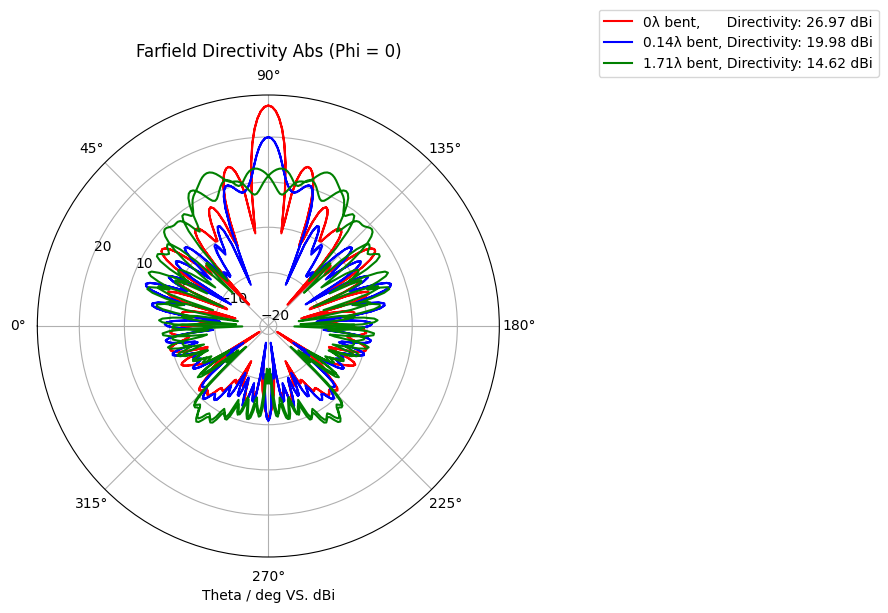

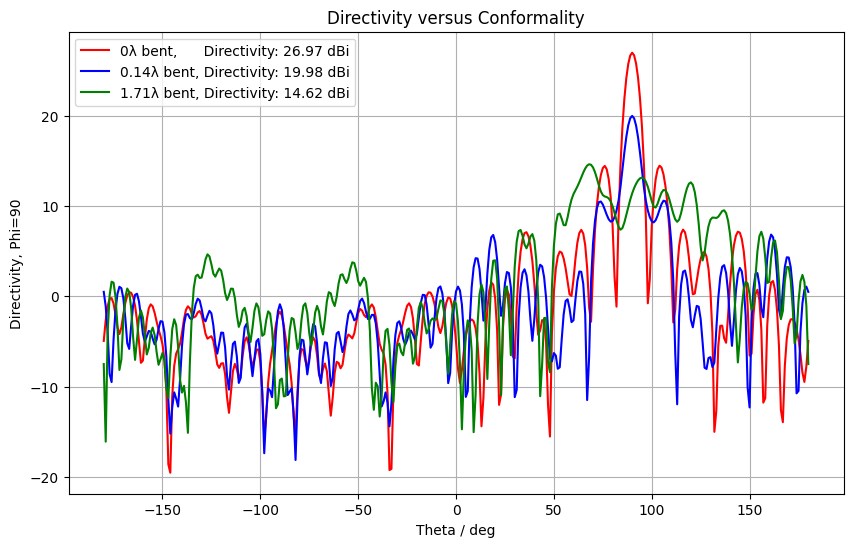

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read and preprocess data from a file
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        theta = []
        directivity = []
        for line in lines:
            if not line.startswith('#') and line.strip():
                parts = line.split()
                theta_val = float(parts[0])
                directivity_val = float(parts[1])
                
                # Convert theta from degrees to radians
                theta_val_rad = np.radians(theta_val)
                
                # Ensure symmetry around the vertical axis (theta=90 degrees)
                if theta_val < 0:
                    # Reflect values on the left side (theta < 0)
                    theta.append(np.pi - theta_val_rad)
                    directivity.append(directivity_val)
                elif theta_val > 0:
                    # Reflect values on the right side (theta > 0)
                    theta.append(-np.pi - theta_val_rad)
                    directivity.append(directivity_val)
                
                # Original values
                theta.append(theta_val_rad)
                directivity.append(directivity_val)

    return np.array(theta), np.array(directivity)

# File paths
file_paths = ['0.txt', '2610.txt', '210.txt']

# Initialize plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Colors and labels for each dataset
colors = ['r', 'b', 'g']
labels = ['0λ bent,      Directivity: 26.97 dBi', '0.14λ bent, Directivity: 19.98 dBi', '1.71λ bent, Directivity: 14.62 dBi']

# Plot each dataset with symmetry
for file_path, color, label in zip(file_paths, colors, labels):
    theta, directivity = read_data(file_path)
    # Sorting the values to ensure a proper plot
    sorted_indices = np.argsort(theta)
    ax.plot(theta[sorted_indices], directivity[sorted_indices], color=color, label=label)

# Customize the plot
ax.set_title('Farfield Directivity Abs (Phi = 0)', va='bottom')
ax.set_theta_zero_location('W')  # 0 degrees at the right
ax.set_theta_direction(-1)  # Clockwise direction

# Customizing the thetagrids
ax.set_thetagrids(range(0, 360, 45), labels=[f'{angle}°' for angle in range(0, 360, 45)])

ax.set_xlabel('Theta / deg VS. dBi')
ax.grid(True)
ax.legend(loc='upper left', bbox_to_anchor=(1.2, 1.2))

# Display the plot
plt.show()

# Initialize plot
plt.figure(figsize=(10, 6))

#Cartesian Plot#

# Function to read data from a file
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        theta = []
        directivity = []
        for line in lines:
            if not line.startswith('#') and line.strip():
                parts = line.split()
                theta.append(float(parts[0]))
                directivity.append(float(parts[1]))
    return theta, directivity

# File paths
file_paths = ['0.txt', '2610.txt', '210.txt']

# Colors and labels for each dataset
colors = ['r', 'b', 'g']
labels = ['0λ bent,      Directivity: 26.97 dBi', '0.14λ bent, Directivity: 19.98 dBi', '1.71λ bent, Directivity: 14.62 dBi']

# Plot each dataset
for file_path, color, label in zip(file_paths, colors, labels):
    theta, directivity = read_data(file_path)
    plt.plot(theta, directivity, color=color, label=label)

# Customize the plot
plt.title('Directivity versus Conformality')
plt.xlabel('Theta / deg')
plt.ylabel('Directivity, Phi=90')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


Data saved to 1.3) Distance_from_feed_21x21.csv


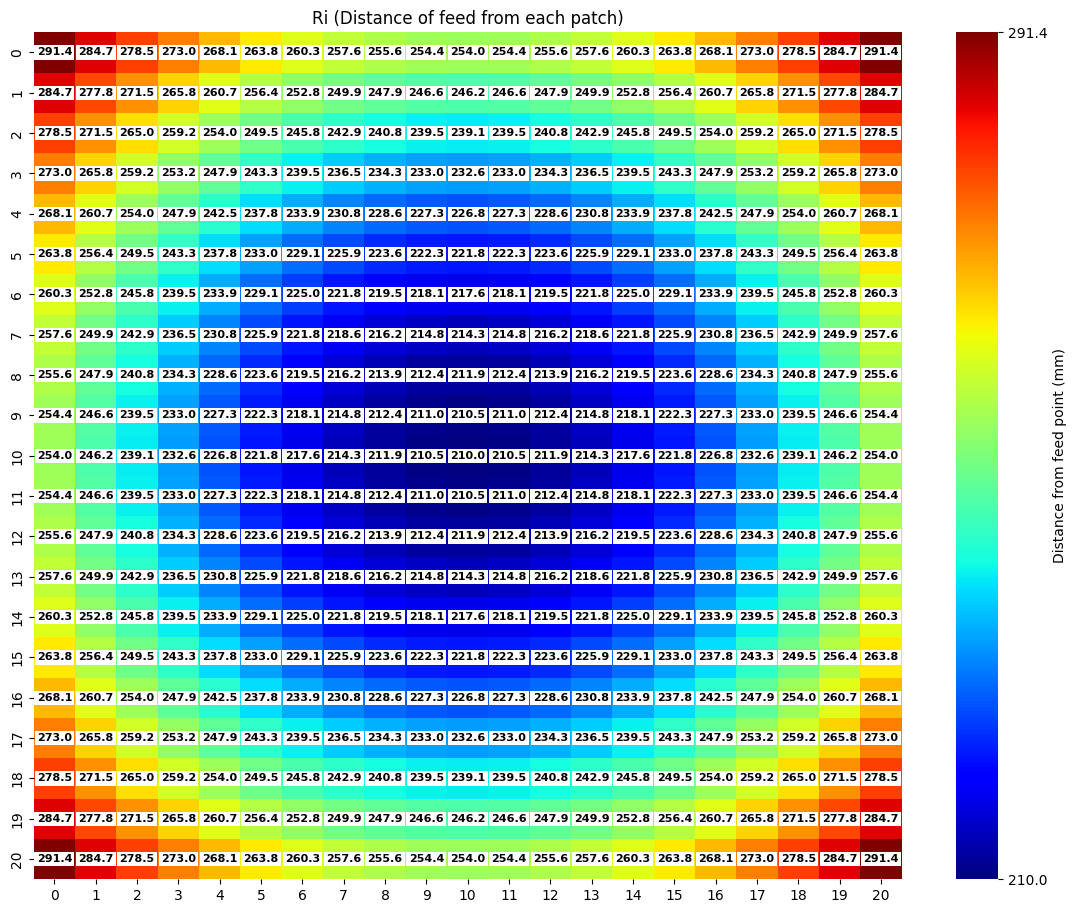

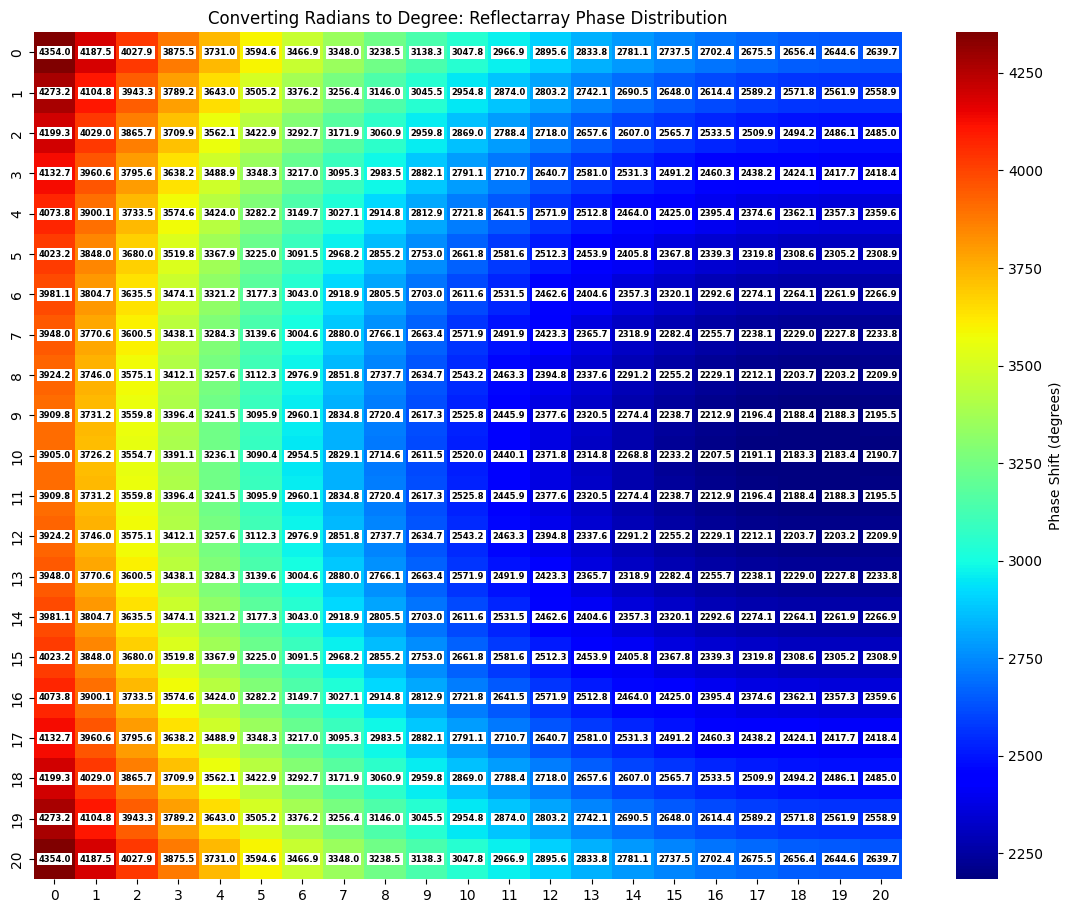

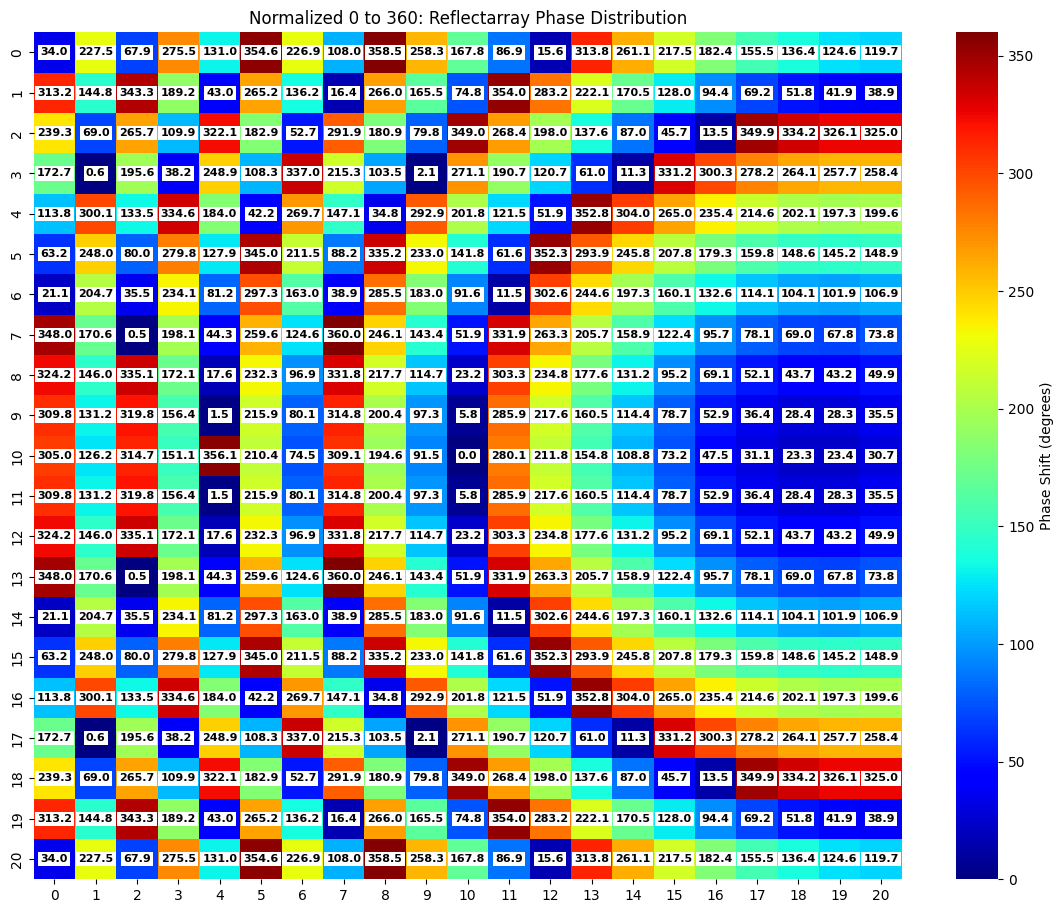

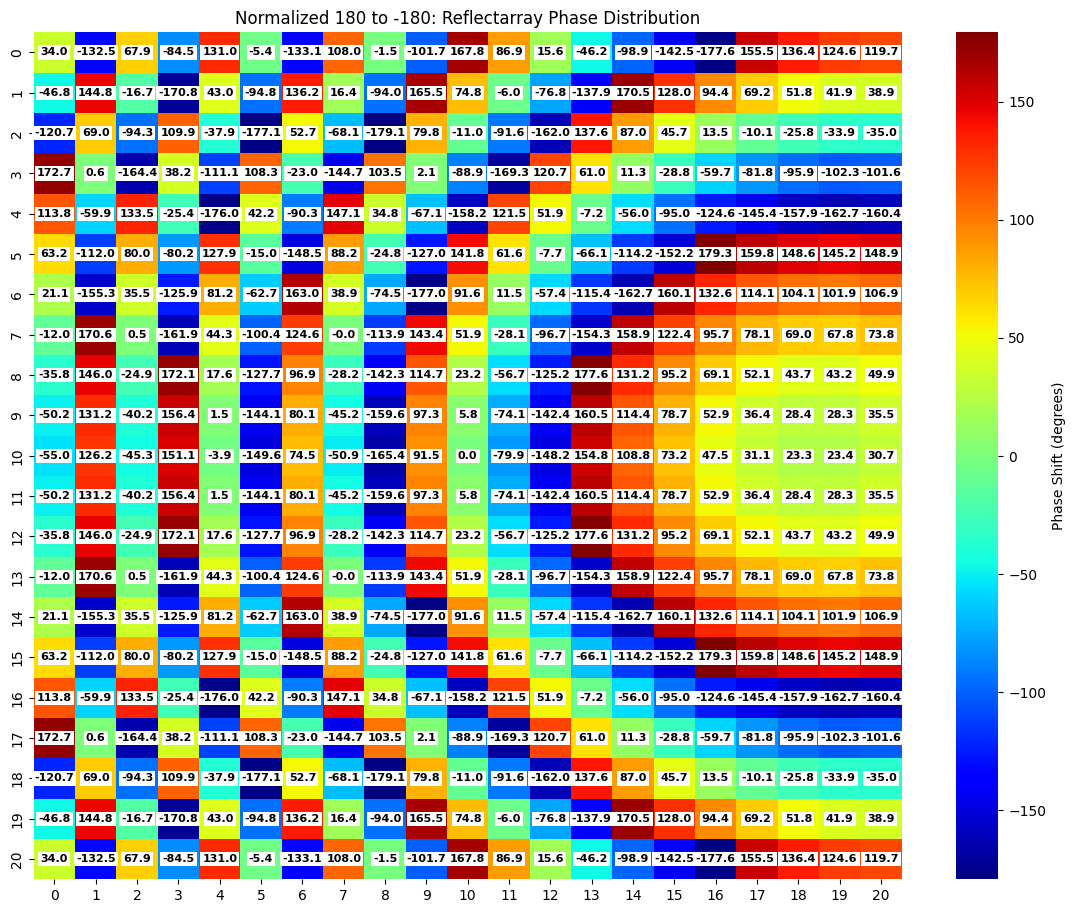

Phase data saved to 1.9) phase_distribution.csv
Highest Phase Value: 179.32 degrees
Lowest Phase Value: -179.15 degrees


CSV file saved to: 1.12) patch size distribution.csv
Highest Patch Value: 14.78 mm
Lowest Patch Value: 1.58 mm


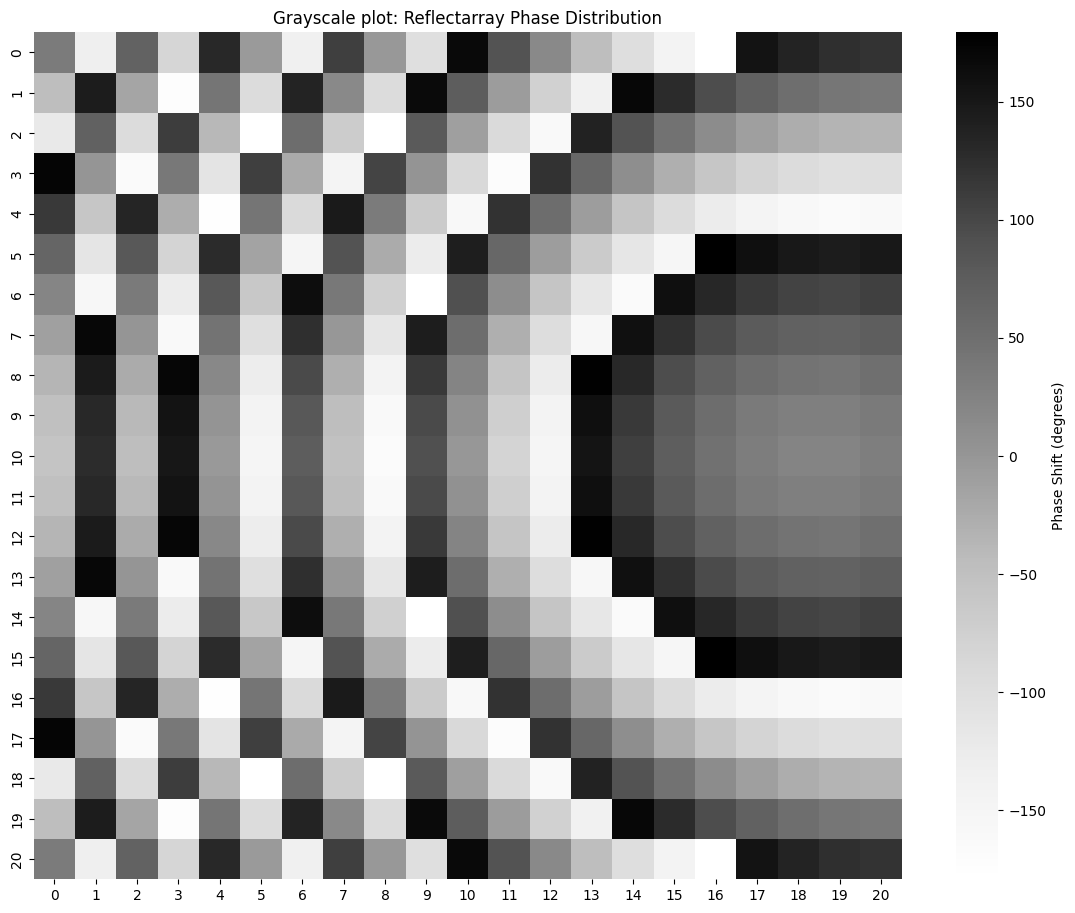

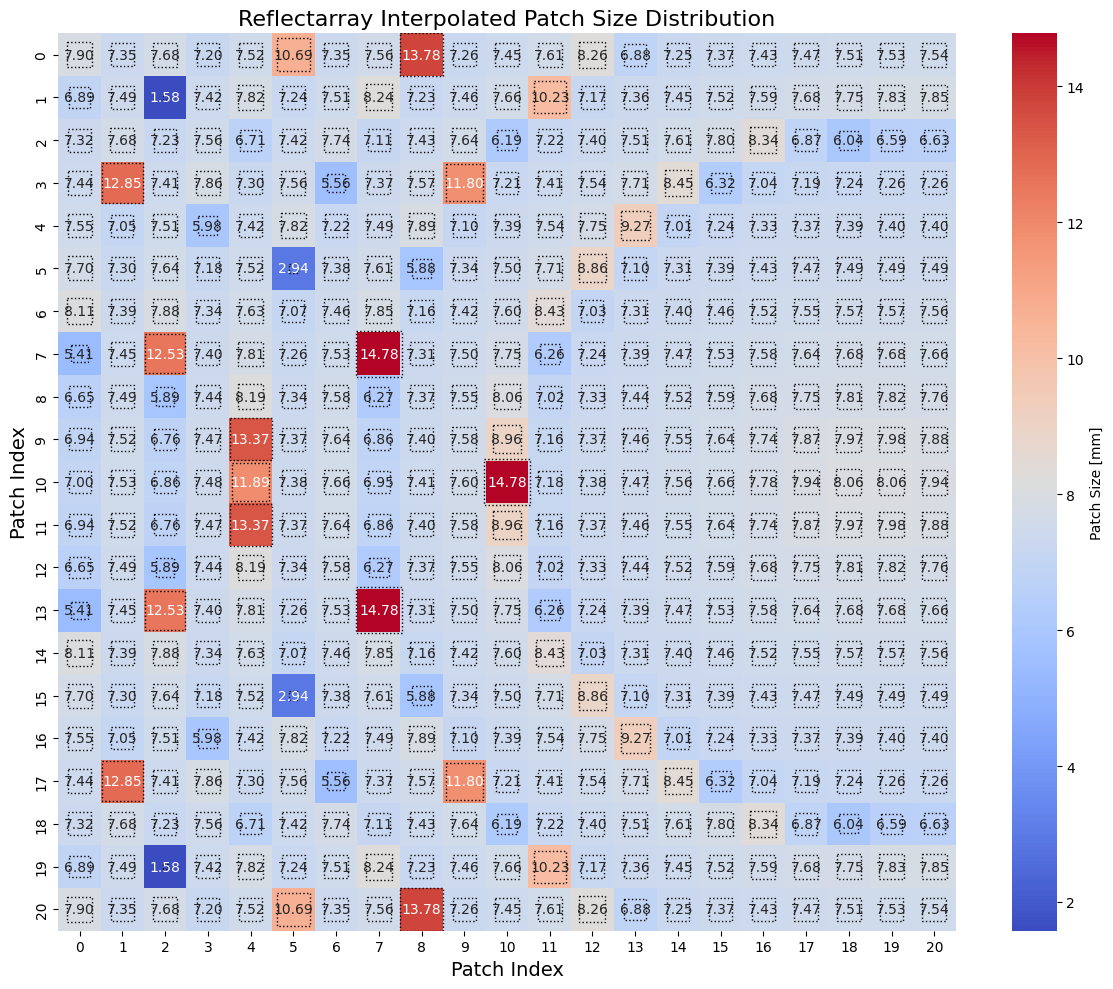

[7.897596990540493, 7.346549412454626, 7.68203037646619, 7.197206495039122, 7.519048033614463, 10.690371901980594, 7.3479225282731715, 7.561610466738381, 13.776578953062236, 7.262590946298587, 7.450705046558673, 7.61237696809274, 8.26122595965426, 6.881349866847287, 7.251955768239299, 7.367374290571111, 7.425358954991018, 7.473477166379972, 7.508921654685746, 7.5307993674616, 7.539970653507444, 6.891911833269471, 7.493450236350164, 1.577246887862826, 7.416780909634538, 7.8184362772715374, 7.236618381167848, 7.509413928090548, 8.23569856868756, 7.233307605852185, 7.455042755314195, 7.656706161104153, 10.231102881068743, 7.168123497828522, 7.357678807082916, 7.445797249343238, 7.524517596018377, 7.586897761379234, 7.677268337388775, 7.749038418586979, 7.8267951027648675, 7.850215923510557, 7.32320152829464, 7.677974136403807, 7.23479515035194, 7.558243378285985, 6.705964737661372, 7.424490736553729, 7.742453391257402, 7.110937472682684, 7.428214525893093, 7.638252968683018, 6.18806180308

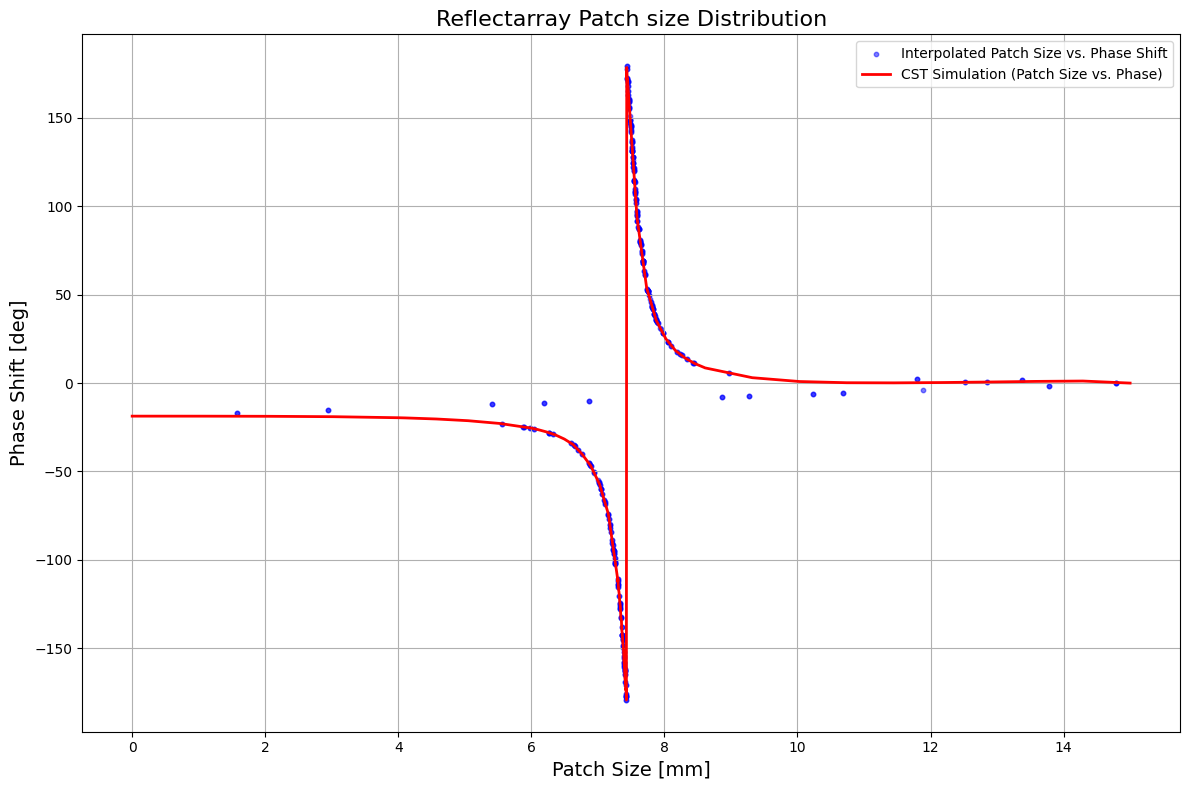

In [3]:
import numpy as np
import pandas as pd
from math import sin, cos, pi, radians, degrees
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import plotly.graph_objects as go
import csv
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import os
import re


frequency = 10e9 
wavelength_mm = 3e8 / frequency * 1000  
k0 = 2 * pi / wavelength_mm 
spacing = wavelength_mm/2.1

theta =  30 # Elevation angle in degrees
phi = 0  # Azimuth angle in degrees

feed_point_position_mm = np.array([0, 0, 210])

x_positions_mm = np.linspace(-spacing * 10, spacing * 10, 21)
y_positions_mm = np.linspace(-spacing * 10, spacing * 10, 21)

X, Y = np.meshgrid(x_positions_mm, y_positions_mm); 
Z = np.zeros_like(X)

#----------------------------------------------------------------------------------------------------------------
#                                        DISTANCE FROM FEED TO PATCH
#----------------------------------------------------------------------------------------------------------------

#### OUTPUT-1.1 ########################################################
#Determining center location of patches

# DataFrame for csv file
df_positions = pd.DataFrame(index=np.arange(1, 23), columns=np.arange(1, 23))

# Fill in the row and column headers
df_positions.iloc[0, 1:] = np.arange(1, 22)
df_positions.iloc[1:, 0] = np.arange(1, 22)

# Fill in the positions
for i, x in enumerate(x_positions_mm, start=1):
    for j, y in enumerate(y_positions_mm, start=1):
        df_positions.iloc[j, i] = f"({x:.2f}, {y:.2f})"


# Export to CSV
csv_file_path = '1.1) Center location of patches.csv'
df_positions.to_csv(csv_file_path, index=False, header=False)

csv_file_path

#### OUTPUT-1.2 ########################################################
#3D visualization of the Ri distance (feed from patch elements) 

# Function to calculate distances and plot elements
def calculate_distance_and_plot_elements(X, Y, Z, feed_point, fig):
    distances = np.sqrt((X - feed_point[0])**2 + (Y - feed_point[1])**2 + (Z - feed_point[2])**2)
    fig.add_trace(go.Scatter3d(x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
                               mode='markers', marker=dict(size=2, color='blue'), name='Array Elements',
                               hoverinfo='text',
                               text=[f'x: {x:.2f}, y: {y:.2f}, z: {z:.2f}, Distance: {d:.2f} mm' for x, y, z, d in zip(X.flatten(), Y.flatten(), Z.flatten(), distances.flatten())]))
    for x, y, z, d in zip(X.flatten(), Y.flatten(), Z.flatten(), distances.flatten()):
        fig.add_trace(go.Scatter3d(x=[x, feed_point[0]], y=[y, feed_point[1]], z=[z, feed_point[2]],
                                   mode='lines', line=dict(color='green', width=2), hoverinfo='text',
                                   text=[f'Distance: {d:.2f} mm']))
    return distances
fig = go.Figure()

# Load distance data from CSV file
df = pd.read_csv('1.3) Distance_from_feed_21x21.csv')
Ri = df.to_numpy(dtype=float)  # Convert DataFrame to numpy array for processing
fig = go.Figure()

# Calculate distances and plot elements
distances = calculate_distance_and_plot_elements(X, Y, Z, feed_point_position_mm, fig)

# Add the feed point to the plot
fig.add_trace(go.Scatter3d(x=[feed_point_position_mm[0]], y=[feed_point_position_mm[1]], z=[feed_point_position_mm[2]],
                           mode='markers', marker=dict(size=10, color='red'), name='Feed Point',
                           hoverinfo='text', text=[f'Feed Point\nx: {feed_point_position_mm[0]:.2f}, y: {feed_point_position_mm[1]:.2f}, z: {feed_point_position_mm[2]:.2f}']))

# Update plot layout for elements and feed point location
fig.update_layout(title='3D Plot of Element Positions, Feed Point Location, and Connection Lines',
                  scene=dict(xaxis_title='X Position (mm)', yaxis_title='Y Position (mm)', zaxis_title='Z Position (mm)'),
                  margin=dict(l=0, r=0, b=0, t=30))

#### OUTPUT-1.3 ########################################################
#Saving the 3D visualization of the Ri distance (feed from patch elements) to csv

# Save the calculated distances to CSV
csv_file_path_array = '1.3) Distance_from_feed_21x21.csv'
with open(csv_file_path_array, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Distance from Feed(mm)'] * 21)  # Header
    for row in distances:
        writer.writerow(row)
print(f"Data saved to {csv_file_path_array}")
fig.show()

#### OUTPUT-1.4 ########################################################
#2D plot heat map depicting locations of the patches from the feed

# Generate the heatmap
df = pd.read_csv(csv_file_path_array)
distances_array = df.to_numpy(dtype=float) # Convert the DataFrame to a 2D array of distances for color mapping
plt.figure(figsize=(14, 11))
ax = sns.heatmap(distances_array, annot=True, fmt=".1f", cmap='jet', cbar_kws={'label': 'Distance from feed point (mm)'})
ax.set_title('Ri (Distance of feed from each patch)')
cbar = ax.collections[0].colorbar
cbar.set_ticks([np.min(distances_array), np.max(distances_array)])
for text in ax.texts:
    text.set_size(8)
    text.set_weight('bold')
    text.set_color('black') 
    text.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.2'))
plt.show()

#----------------------------------------------------------------------------------------------------------------
#                                       PHASE DISTRIBUTION OF THE REFLECTARRAY
#----------------------------------------------------------------------------------------------------------------

# Calculate phase shift for all elements in radians
phi_a = k0 * (Ri - np.sin(np.radians(theta)) * (X * np.cos(np.radians(phi)) + Y * np.sin(np.radians(phi))))

# Convert phase shift from radians to degrees
phi_a_deg = np.degrees(phi_a)

# Normalize phase shift to be within the range 0-360 degrees
phi_a_deg_normalized = phi_a_deg % 360

# For the range -180 to 180 degrees, adjust the phase values
phi_a_deg_adjusted = np.where(phi_a_deg_normalized > 180, phi_a_deg_normalized - 360, phi_a_deg_normalized)

#### OUTPUT-1.5 ########################################################
#2D plot heat map depicting phase shift values at all 441 patch locations

#Generate the heatmap for phase distribution 
plt.figure(figsize=(14, 11))
ax = sns.heatmap(phi_a_deg.reshape(21, 21), annot=True, fmt=".1f", cmap='jet',
                 cbar_kws={'label': 'Phase Shift (degrees)'})
ax.set_title('Converting Radians to Degree: Reflectarray Phase Distribution')
for text in ax.texts:
    text.set_size(6)  # Adjust font size
    text.set_weight('bold')  # Bold text for visibility
    text.set_color('black') 
    text.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.2'))
plt.show()

#### OUTPUT-1.6 ########################################################
#2D plot heat map depicting phase shift values at all 441 patch locations

#Generate the heatmap for phase distribution 
plt.figure(figsize=(14, 11))
ax = sns.heatmap(phi_a_deg_normalized.reshape(21, 21), annot=True, fmt=".1f", cmap='jet',
                 cbar_kws={'label': 'Phase Shift (degrees)'})
ax.set_title('Normalized 0 to 360: Reflectarray Phase Distribution')
for text in ax.texts:
    text.set_size(8)  # Adjust font size
    text.set_weight('bold')  # Bold text for visibility
    text.set_color('black') 
    text.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.2'))
plt.show()

#### OUTPUT-1.7 ########################################################
#2D plot heat map depicting phase shift values at all 441 patch locations

#Generate the heatmap for phase distribution 
plt.figure(figsize=(14, 11))
ax = sns.heatmap(phi_a_deg_adjusted.reshape(21, 21), annot=True, fmt=".1f", cmap='jet',
                 cbar_kws={'label': 'Phase Shift (degrees)'})
ax.set_title('Normalized 180 to -180: Reflectarray Phase Distribution')
for text in ax.texts:
    text.set_size(8)  # Adjust font size
    text.set_weight('bold')  # Bold text for visibility
    text.set_color('black') 
    text.set_bbox(dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.2'))
plt.show()

#### OUTPUT-1.8 ########################################################
#2D Grayscale plot

#Generate the heatmap for phase distribution
plt.figure(figsize=(14, 11))
ax = sns.heatmap(phi_a_deg_adjusted.reshape(21, 21), annot=False, fmt=".1f", cmap='Greys',
                 cbar_kws={'label': 'Phase Shift (degrees)'})
ax.set_title('Grayscale plot: Reflectarray Phase Distribution')

#### OUTPUT-1.9 ########################################################
#2D plot heat map depicting phase shift values at all 441 patch locations to csv

#Save phase data to CSV
csv_file_path_phase = '1.9) phase_distribution.csv'
with open(csv_file_path_phase, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Phase Shift (degrees)'] * 21)  # Header
    for row in phi_a_deg_adjusted.reshape(21, 21):
        writer.writerow(row)
print(f"Phase data saved to {csv_file_path_phase}")

#### OUTPUT-1.10 ########################################################
# Finding the highest and lowest values of the phase distribution

highest_phase_value = np.max(phi_a_deg_adjusted)
lowest_phase_value = np.min(phi_a_deg_adjusted)
print(f"Highest Phase Value: {highest_phase_value:.2f} degrees")
print(f"Lowest Phase Value: {lowest_phase_value:.2f} degrees")

#----------------------------------------------------------------------------------------------------------------
#                                       CST data
#----------------------------------------------------------------------------------------------------------------

#### OUTPUT-1.11 ########################################################
#Deembedded: Range of Patch size versus Phase Shift, Reflection, and Normalized Phase

# Step 1: Read the Phase and Reflection Data
phase_file_path = '2.1) Unit cell data with deembedding -180 to 180.txt'
reflection_file_path = '2.1) Unit cell data with deembedding reflection.txt'

# Reading phase data, skipping initial comments and header row
phase_data = pd.read_csv(phase_file_path, comment='#', delimiter='\t', names=['Wp', 'Phase'], skiprows=2)

# Reading reflection data
reflection_data = pd.read_csv(reflection_file_path, comment='#', delimiter='\t', skiprows=2)
reflection_data.columns = ['Wp', 'Reflection']

# Normalize the phase data
phase_data['Normalized Phase'] = phase_data['Phase'].apply(lambda x: (x + 360) % 360 if x < 0 else x)

# Define colors for each data line for better visibility and emphasis
colors = {
    "Phase": "blue",  # Primary data
    "Normalized Phase": "red",  # Secondary importance
    "Reflection": "#A9A9A9"  # Subtle grey for less visual impact
}

# Create a plot with customized y-axes for each data type
fig = go.Figure()

# Reflection Data
fig.add_trace(go.Scatter(x=reflection_data['Wp'], y=reflection_data['Reflection'], name='Reflection', mode='lines+markers', line=dict(color=colors["Reflection"]), yaxis='y1'))

# Normalized Phase Data
fig.add_trace(go.Scatter(x=phase_data['Wp'], y=phase_data['Normalized Phase'], name='Normalized Phase (0 to 360)', mode='lines+markers', line=dict(color=colors["Normalized Phase"]), yaxis='y2'))

# Original Phase Data
fig.add_trace(go.Scatter(x=phase_data['Wp'], y=phase_data['Phase'], name='Phase (-180 to 180)', mode='lines+markers', line=dict(color=colors["Phase"]), yaxis='y3'))

# Layout - titles, axes, etc., with adjusted legend and axes positions
fig.update_layout(
    title='Deembedded: Range of Patch size versus Phase Shift, Reflection, and Normalized Phase',
    xaxis_title='Patch size (mm)',
    yaxis=dict(
        title='Reflection',
        titlefont=dict(color=colors["Reflection"]),
        tickfont=dict(color=colors["Reflection"]),
        range=[1.1 * reflection_data['Reflection'].min(), 1.1 * reflection_data['Reflection'].max()]
    ),
    yaxis2=dict(
        title='Phase (0 to 360)',
        titlefont=dict(color=colors["Normalized Phase"]),
        tickfont=dict(color=colors["Normalized Phase"]),
        overlaying='y',
        side='left',
        position=0.1,
        range=[0, 360]  # Setting the range from 0 to 360
    ),
    yaxis3=dict(
        title='Phase (-180 to 180)',
        titlefont=dict(color=colors["Phase"]),
        tickfont=dict(color=colors["Phase"]),
        overlaying='y',
        side='right',
        position=1,
        range=[-180, 180]  # Setting the range from -180 to 180
    ),
    legend=dict(
        x=0.9,
        y=0.9,
        traceorder='normal',
        bgcolor='rgba(255,255,255,0.5)',
        xanchor='auto',
        yanchor='auto'
    )
)

# Show the figure
fig.show()

#----------------------------------------------------------------------------------------------------------------
#                                       LINEAR INTERPOLATION
#----------------------------------------------------------------------------------------------------------------

# Load the CSV files needed for interpolation
phase_file_path = '2.1) Unit cell data with deembedding -180 to 180.txt'
reflection_file_path = '2.1) Unit cell data with deembedding reflection.txt'

# Correctly reading the phase and reflection data from the files
phase_data = pd.read_csv(phase_file_path, delimiter='\t', comment='#', names=['Wp', 'Phase'])
reflection_data = pd.read_csv(reflection_file_path, delimiter='\t', comment='#', names=['Wp', 'Reflection'])

# Create the interpolation function
interpolation_function = interp1d(phase_data['Phase'], phase_data['Wp'], kind='linear', fill_value='extrapolate')

# Apply the interpolation function to the phase distribution data
mapped_patch_sizes = interpolation_function(phi_a_deg_adjusted.flatten())

# Reshaping back to the original 21x21 grid
mapped_patch_sizes_reshaped = mapped_patch_sizes.reshape(21, 21)

#### OUTPUT-1.12 ########################################################

# Saving the mapped patch sizes to a new CSV file
output_csv_path_corrected = '1.12) patch size distribution.csv'
with open(output_csv_path_corrected, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Patch Size (mm)'] * 21)  # Header
    for row in mapped_patch_sizes_reshaped:
        writer.writerow(row)

#### OUTPUT-1.13 ########################################################

print(f"CSV file saved to: {output_csv_path_corrected}")
print(f"Highest Patch Value: {np.max(mapped_patch_sizes_reshaped):.2f} mm")
print(f"Lowest Patch Value: {np.min(mapped_patch_sizes_reshaped):.2f} mm")

#### OUTPUT-1.14 ########################################################

#Patch Size Distribution Based on Phase
total_width_mm = np.max(x_positions_mm) - np.min(x_positions_mm)
scale_factor = total_width_mm / 21 
plt.figure(figsize=(12, 10))
ax = sns.heatmap(mapped_patch_sizes_reshaped, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Patch Size [mm]'},) # annot_kws={"weight": "bold"}
plt.title('Reflectarray Interpolated Patch Size Distribution', fontsize=16)
plt.xlabel('Patch Index', fontsize=14)
plt.ylabel('Patch Index', fontsize=14)

# Overlay corrected Patch Dimensions
for row in range(21):
    for col in range(21):
        # Convert patch size from mm to cell units using the scale factor
        patch_size_mm = mapped_patch_sizes_reshaped[row, col]
        patch_size_cells = patch_size_mm / scale_factor

        # Rectangle's bottom left corner position in cell units
        # Align the center of the patch with the center of the cell
        bottom_left_x = col + 0.5 - patch_size_cells / 2
        bottom_left_y = row + 0.5 - patch_size_cells / 2

        # Create a rectangle patch with the calculated dimensions and position
        rect = patches.Rectangle((bottom_left_x, bottom_left_y), patch_size_cells, patch_size_cells, linewidth=1, edgecolor='k', facecolor='none', linestyle=':')
        ax.add_patch(rect)
plt.tight_layout()
plt.show()

#### OUTPUT-1.15 ########################################################

Wp = phase_data['Wp']; Phase = phase_data['Phase']
plt.figure(figsize=(12, 8))
plt.scatter(mapped_patch_sizes, phi_a_deg_adjusted.flatten(), color='blue', label='Interpolated Patch Size vs. Phase Shift', alpha=0.5, s=10)
plt.plot(Wp, Phase, 'r-', label='CST Simulation (Patch Size vs. Phase)', linewidth=2)
plt.title('Reflectarray Patch size Distribution', fontsize=16)
plt.xlabel('Patch Size [mm]', fontsize=14)
plt.ylabel('Phase Shift [deg]', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

#### OUTPUT-1.16 ########################################################
# Load the CSV file
df = pd.read_csv('1.12) patch size distribution.csv')

# Assuming you want the first 20 rows of all columns
first_20_rows = df.iloc[:20, :]

# Flatten the DataFrame to a list
sizes = first_20_rows.values.flatten().tolist()

# Now, sizes will contain all the values from the first 20 rows of your CSV file
print(sizes)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc5ee653-20d6-465e-a404-0025c2e8ab23' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>